In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
c = df.isnull().sum()
c[c>0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001325,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

lets change credit history to object

In [8]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [9]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001325,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


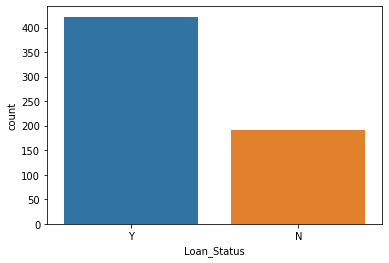

In [10]:
sns.countplot(df.Loan_Status)

In [11]:
df = df.drop('Loan_ID',axis=1)

### Catagorical analysis

In [12]:
df_cat = df.select_dtypes(include='O')
print(df_cat.columns,len(df_cat.columns))

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 8


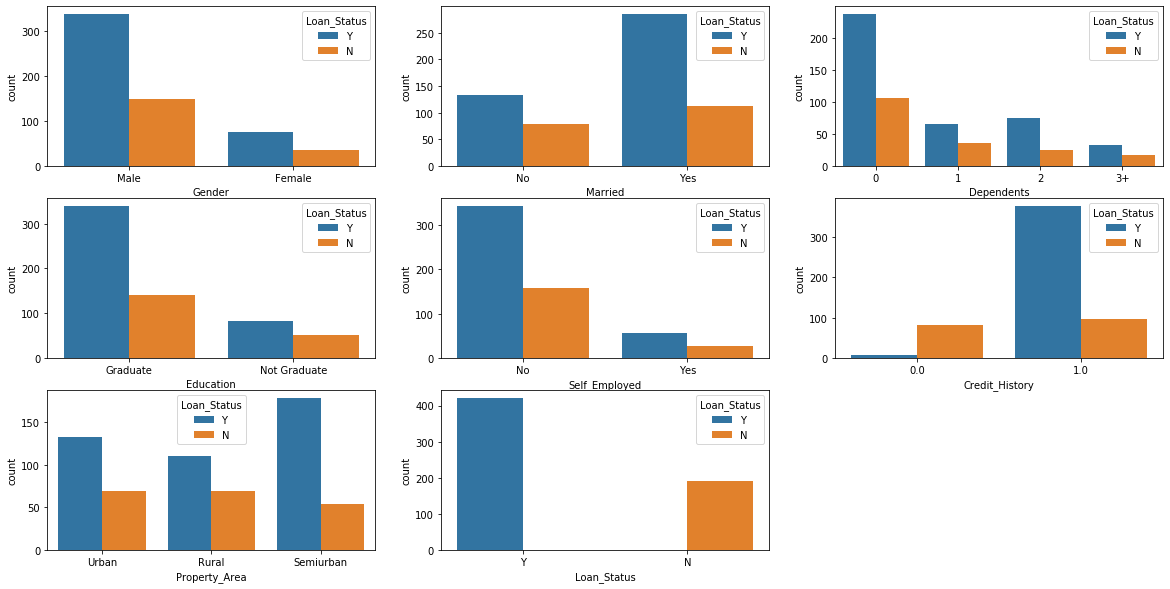

In [13]:
fig = plt.figure(figsize=(20,10))
col = df_cat.columns
for i in range(len(col)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(col[i],hue='Loan_Status',data=df_cat)

- Males, Graduates , Married ,not selfemployed ,from semiurban area and with credit history got more chances of loan approval

In [14]:
df_num = df.select_dtypes(include=['float64','int64'])
df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

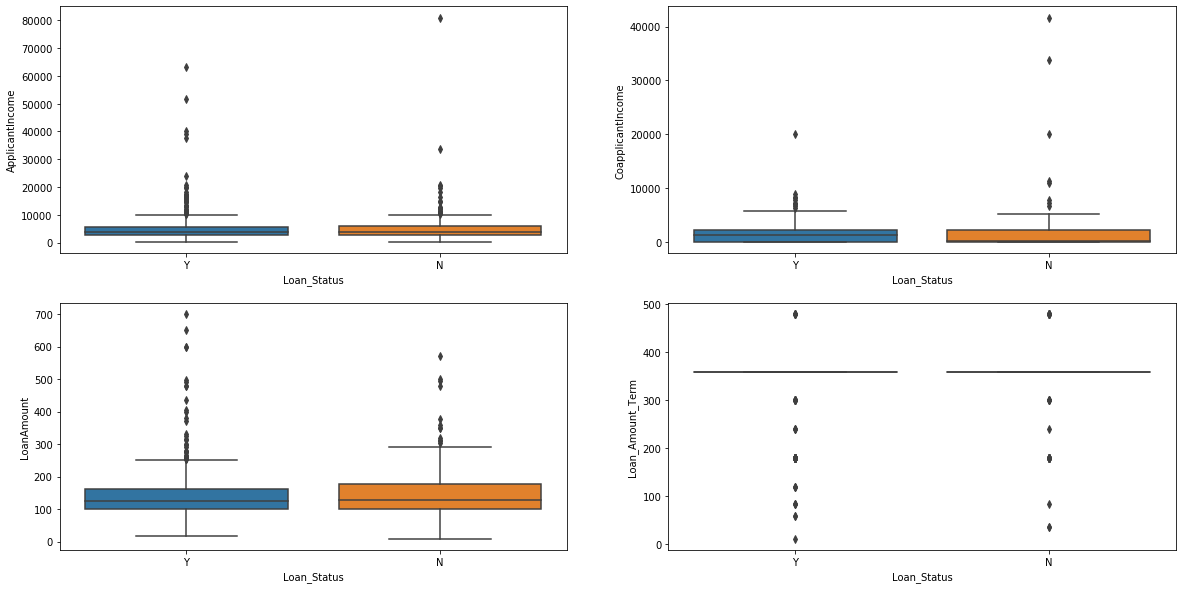

In [15]:
fig = plt.figure(figsize=(20,10))
col = df_num.columns
for i in range(len(col)):
    fig.add_subplot(2,2,i+1)
    sns.boxplot(y=col[i],x='Loan_Status',data=df)

### Imputation of missing values

In [16]:
df_num.isnull().sum().sort_values(ascending=False)

LoanAmount           22
Loan_Amount_Term     14
CoapplicantIncome     0
ApplicantIncome       0
dtype: int64

In [17]:
# fill every missing value with their previous value in the same column


# df_num.fillna(method = 'bfill',inplace=True)
# df_num.isnull().sum().sort_values(ascending=False)

# fill every missing value with mode
col = df_num.columns

df_num[col] = df_num[col].fillna(df_num[col].mode().iloc[0])
df_num.isnull().sum().sort_values(ascending=False)

Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
dtype: int64

In [18]:
df_cat.isnull().sum().sort_values(ascending=False)

Credit_History    50
Self_Employed     32
Dependents        15
Gender            13
Married            3
Loan_Status        0
Property_Area      0
Education          0
dtype: int64

In [19]:
# lets fill them with their most frequent values
df_cat = df_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

df_cat.isnull().sum().sort_values(ascending=False)

Loan_Status       0
Property_Area     0
Credit_History    0
Self_Employed     0
Education         0
Dependents        0
Married           0
Gender            0
dtype: int64

### Label Encoding

In [20]:
target = df_cat['Loan_Status']
df_cat = df_cat.drop('Loan_Status',axis=1)

d = {'Y':1,'N':0}

target = target.map(d)

In [21]:
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


In [26]:
from sklearn.preprocessing import LabelEncoder

L = LabelEncoder()

col = df_cat.columns
for i in col:
    df_cat[i] =  L.fit_transform(df_cat[i])

df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [27]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [28]:
df = pd.concat([df_cat,df_num],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,0,0,1,2,5849,0.0,120.0,360.0
1,1,1,1,0,0,1,0,4583,1508.0,128.0,360.0
2,1,1,0,0,1,1,2,3000,0.0,66.0,360.0
3,1,1,0,1,0,1,2,2583,2358.0,120.0,360.0
4,1,0,0,0,0,1,2,6000,0.0,141.0,360.0


### Modelling

In [46]:
from sklearn.model_selection import train_test_split

x = df
y = target 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
272,1,0,0,0,0,1,0,2833,1857.0,126.0,360.0
284,1,1,0,0,0,1,0,20667,0.0,120.0,360.0
556,0,0,0,0,0,1,2,2667,1625.0,84.0,360.0
127,1,0,0,0,0,1,0,3865,1640.0,120.0,360.0
201,1,0,2,0,0,0,1,4923,0.0,166.0,360.0


### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier()

model.fit(x_train,y_train)

predict = model.predict(x_test)

print('Accuracy score',accuracy_score(y_test,predict))
print('Accuracy score after 10 fold cross validation',cross_val_score(model,x,y,cv=10,scoring='accuracy').mean())

Accuracy score 0.6747967479674797
Accuracy score after 10 fold cross validation 0.618527192297684


### DecisionTreeClassifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train,y_train)

predict = model.predict(x_test)

print('Accuracy score',accuracy_score(y_test,predict))
print('Accuracy score after 10 fold cross validation',cross_val_score(model,x,y,cv=10,scoring='accuracy').mean())

Accuracy score 0.7317073170731707
Accuracy score after 10 fold cross validation 0.7165235493104345


### SVM

In [45]:
from sklearn.svm import SVC

model = SVC()

model.fit(x_train,y_train)

predict = model.predict(x_test)

print('Accuracy score',accuracy_score(y_test,predict))
print('Accuracy score after 10 fold cross validation',cross_val_score(model,x,y,cv=10,scoring='accuracy').mean())

Accuracy score 0.6585365853658537
Accuracy score after 10 fold cross validation 0.6906062971636743
